In [2]:
import pandas as pd

df = pd.read_csv("final_dc.csv")

print("Shape:", df.shape)

print("\nColumns:", list(df.columns))

print("\nData types:")
print(df.dtypes)

df.head()


Shape: (6423, 25)

Columns: ['id', 'name', 'host_id', 'host_name', 'host_location', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'min_nights', 'max_nights', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'last_review', 'reviews_per_month', 'number_of_reviews', 'total_listings', 'availability_365', 'number_of_reviews_ltm']

Data types:
id                             int64
name                          object
host_id                        int64
host_name                     object
host_location                 object
neighbourhood                 object
latitude                     float64
longitude                    float64
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                       int64
beds                           int64
amenities                     object
price                          int64
min_nights        

,id,name,host_id,host_name,host_location,neighbourhood,latitude,longitude,room_type,accommodates,...,min_nights,max_nights,estimated_occupancy_l365d,estimated_revenue_l365d,last_review,reviews_per_month,number_of_reviews,total_listings,availability_365,number_of_reviews_ltm
0,3344,"White House-Center City, entire 2BR/2BA Condo",4957,A.J.,"Washington, DC","Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90145,-77.02679,Entire home/apt,2,...,59,370,0,0,2016-08-31,0.05,10,2,362,0
1,3686,Vita's Hideaway,4645,Vita,"Washington D.C., DC",Historic Anacostia,38.86339,-76.98889,Private room,1,...,31,365,0,0,2023-08-30,0.47,84,1,298,0
2,3943,Historic Rowhouse Near Monuments,5059,Vasa,"Washington, DC","Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91195,-77.00456,Private room,2,...,1,1125,246,19434,2025-05-27,2.78,546,5,331,41
3,4197,Capitol Hill Bedroom walk to Metro,5061,Sandra,"Washington D.C., DC","Capitol Hill, Lincoln Park",38.88719,-76.99472,Private room,1,...,6,29,72,9216,2025-05-20,0.34,67,2,346,6
4,4529,Bertina's House Part One,5803,Bertina,"Washington, DC","Eastland Gardens, Kenilworth",38.90585,-76.94469,Private room,2,...,30,1125,0,0,2019-07-05,0.53,102,2,63,0


In [3]:
print(df["price"].describe())

print("\nTop 10 prices:")
print(df["price"].sort_values(ascending=False).head(10))

print("\nBottom 10 prices:")
print(df["price"].sort_values().head(10))


count     6423.000000
mean       295.947532
std       2721.016549
min          0.000000
25%         33.500000
50%        106.000000
75%        172.000000
max      50000.000000
Name: price, dtype: float64

Top 10 prices:
3875    50000
3865    50000
3861    50000
3872    50000
3873    50000
3871    50000
3860    50000
3876    40000
3984    40000
3979    40000
Name: price, dtype: int64

Bottom 10 prices:
2972    0
1920    0
1924    0
5446    0
1898    0
1919    0
1909    0
5466    0
5476    0
3803    0
Name: price, dtype: int64


### Price Distribution Recap

- The initial distribution was heavily skewed with a mean price of approximately $296 and a median of about $106.  
- Detected outliers:
  - Minimum price = $0 (likely invalid or missing values)
  - Maximum price = $50,000 (extreme high-end or dirty data)
- The large gap between mean and median, plus a very high standard deviation ($2,721), indicates strong right skew.
- To clean this:
  - Removed rows where `price == 0`.
  - Removed listings with `price > 1000` to cap extreme outliers.
- This makes the price distribution more stable for downstream modeling (for example, linear regression or neural networks).

Result: Cleaner and more realistic price range with reduced skew and lower variance.


In [5]:
print("Zero-price listings:", (df["price"] == 0).sum())
print("Listings over $1000:", (df["price"] > 1000).sum())

df = df[df["price"] > 0]

df = df[df["price"] <= 1000]

df["price"].describe()


Zero-price listings: 1577
Listings over $1000: 36


count    4810.000000
mean      160.956549
std       106.852430
min        10.000000
25%        92.000000
50%       134.000000
75%       199.000000
max      1000.000000
Name: price, dtype: float64

### Cleaned Price Distribution Summary

- Removed 1,577 zero-price listings and 36 listings priced over $1,000.
- New price range: $10 to $1,000.
- Mean: $161
- Median: $134
- Standard deviation: $107

This cleaned distribution is far less skewed than the original and provides a more realistic range for analysis and predictive modeling.


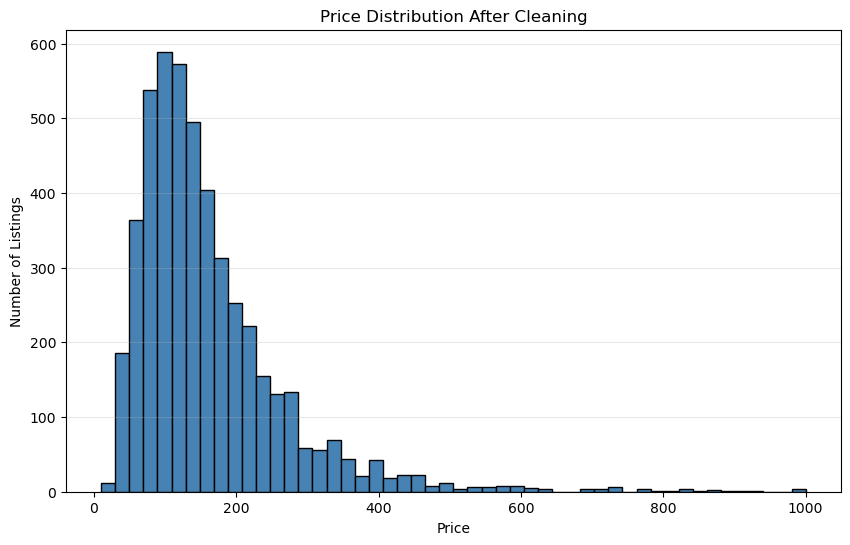

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=50, color='steelblue', edgecolor='black')
plt.title("Price Distribution After Cleaning")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.grid(axis='y', alpha=0.3)
plt.show()


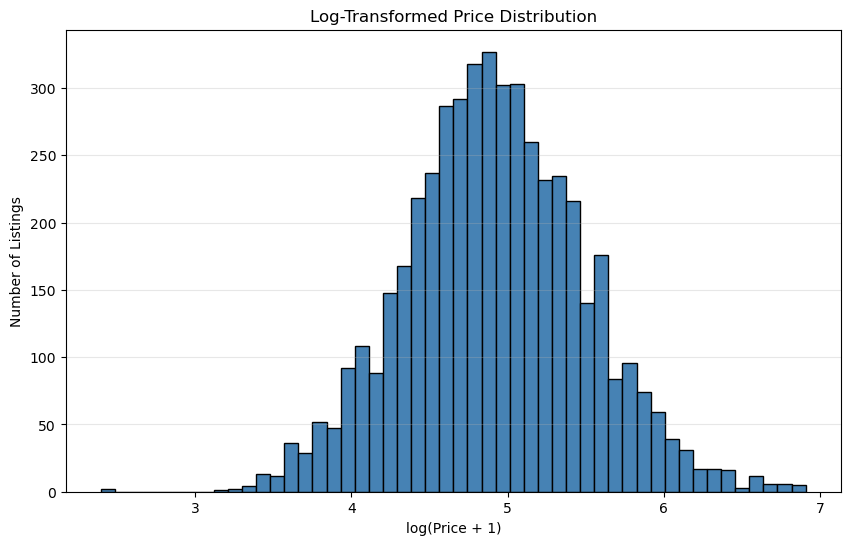

In [7]:
import numpy as np

df["log_price"] = np.log1p(df["price"]) 

plt.figure(figsize=(10, 6))
plt.hist(df["log_price"], bins=50, color='steelblue', edgecolor='black')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price + 1)")
plt.ylabel("Number of Listings")
plt.grid(axis='y', alpha=0.3)
plt.show()


### Log Transformation of Price

The original price distribution was heavily right-skewed, with most listings concentrated between $50–$200 and a long tail of high-price listings.  
To address this skewness, we applied a natural log transformation to the `price` variable:

\[
\text{log\_price} = \ln(\text{price} + 1)
\]

- This transformation compresses high values and expands low values, resulting in a more symmetric distribution.
- A more balanced distribution improves the performance and stability of many predictive models (such as linear regression and neural networks).
- After transformation, the distribution resembles a normal curve, making it


In [8]:
df["amenities"].head(10).tolist()


['["Hot water", "Elevator", "Paid parking on premises", "Fire extinguisher", "Smoke alarm", "Wifi", "Hangers", "Essentials", "Long term stays allowed", "Washer", "Host greets you", "Books and reading material", "TV with standard cable", "Air conditioning", "Breakfast", "Shampoo", "Kitchen", "Exercise equipment", "First aid kit", "Iron", "Heating", "Gym", "Dryer"]',
 '["Hot water", "Refrigerator", "Backyard", "Smoke alarm", "Free street parking", "Cooking basics", "Wifi", "Hangers", "Essentials", "Washer", "Dishes and silverware", "Dishwasher", "Coffee maker", "Extra pillows and blankets", "Patio or balcony", "Bed linens", "Carbon monoxide alarm", "Stove", "Shampoo", "Microwave", "Oven", "Kitchen", "First aid kit", "Heating", "Indoor fireplace", "Dryer"]',
 '["Ceiling fan", "Hot water", "Freezer", "Refrigerator", "Fire extinguisher", "Coffee maker: Keurig coffee machine", "Smoke alarm", "Baking sheet", "Free street parking", "Window AC unit", "Wifi", "Cooking basics", "Hair dryer", "Roo

In [9]:
import json
import pandas as pd
import numpy as np
import re
from collections import Counter

# 1) Parse each cell to a Python list
def parse_amenities(cell):
    if pd.isna(cell):
        return []
    try:
        arr = json.loads(cell)             # cell looks like '["Wifi","Kitchen",...]'
        arr = [str(x) for x in arr]        # ensure strings
        return arr
    except Exception:
        # Fallback: very defensive splitter if a row is malformed
        s = str(cell)
        s = re.sub(r'^[\[\(]{1}|[\]\)]{1}$', '', s)  # strip brackets
        parts = [p.strip().strip('"\'') for p in s.split(',')]
        return [p for p in parts if p]

amen_lists = df["amenities"].apply(parse_amenities)
amen_lists.head(3).tolist()


[['Hot water',
  'Elevator',
  'Paid parking on premises',
  'Fire extinguisher',
  'Smoke alarm',
  'Wifi',
  'Hangers',
  'Essentials',
  'Long term stays allowed',
  'Washer',
  'Host greets you',
  'Books and reading material',
  'TV with standard cable',
  'Air conditioning',
  'Breakfast',
  'Shampoo',
  'Kitchen',
  'Exercise equipment',
  'First aid kit',
  'Iron',
  'Heating',
  'Gym',
  'Dryer'],
 ['Hot water',
  'Refrigerator',
  'Backyard',
  'Smoke alarm',
  'Free street parking',
  'Cooking basics',
  'Wifi',
  'Hangers',
  'Essentials',
  'Washer',
  'Dishes and silverware',
  'Dishwasher',
  'Coffee maker',
  'Extra pillows and blankets',
  'Patio or balcony',
  'Bed linens',
  'Carbon monoxide alarm',
  'Stove',
  'Shampoo',
  'Microwave',
  'Oven',
  'Kitchen',
  'First aid kit',
  'Heating',
  'Indoor fireplace',
  'Dryer'],
 ['Ceiling fan',
  'Hot water',
  'Freezer',
  'Refrigerator',
  'Fire extinguisher',
  'Coffee maker: Keurig coffee machine',
  'Smoke alarm',


In [10]:
import re

def normalize_item(s: str) -> str:
    s = s.lower().strip()
    s = re.sub(r"\s+", " ", s)

    canon_map = [
        (r"(wi[- ]?fi|ethernet connection|wifi.*mbps)", "wifi"),
        (r"air conditioning|ac unit|central air conditioning|window ac unit", "air_conditioning"),
        (r"heating|central heating|portable heater", "heating"),
        (r"tv|.*hdtv.*|.*tv with.*", "tv"),
        (r"kitchenette|kitchen", "kitchen"),
        (r"coffee maker.*|coffee.*machine", "coffee_maker"),
        (r"free street parking|paid parking.*|free parking on premises|parking.*", "parking"),
        (r"washer|free washer.*", "washer"),
        (r"dryer|free dryer.*", "dryer"),
        (r"smoke alarm", "smoke_alarm"),
        (r"carbon monoxide alarm", "co_alarm"),
        (r"fire extinguisher", "fire_extinguisher"),
        (r"first aid kit", "first_aid"),
        (r"self check-in|smart lock|lockbox", "self_check_in"),
        (r"bed linens", "bed_linens"),
        (r"dishes and silverware", "dishes_silverware"),
        (r"cooking basics", "cooking_basics"),
        (r"hair dryer", "hair_dryer"),
        (r"gym|exercise equipment.*", "gym"),
        (r"children.*books.*toys|pack .*n .*play|travel crib", "family_friendly"),
    ]
    for pat, repl in canon_map:
        if re.search(pat, s):
            return repl

    # fallback: strip punctuation; keep short descriptive token
    s = re.sub(r"[^\w\s\-]", "", s).strip()
    return s

amen_lists_norm = amen_lists.apply(lambda lst: [normalize_item(x) for x in lst if str(x).strip()])
amen_lists_norm.head(2).tolist()


[['hot water',
  'elevator',
  'parking',
  'fire_extinguisher',
  'smoke_alarm',
  'wifi',
  'hangers',
  'essentials',
  'long term stays allowed',
  'washer',
  'host greets you',
  'books and reading material',
  'tv',
  'air_conditioning',
  'breakfast',
  'shampoo',
  'kitchen',
  'gym',
  'first_aid',
  'iron',
  'heating',
  'gym',
  'dryer'],
 ['hot water',
  'refrigerator',
  'backyard',
  'smoke_alarm',
  'parking',
  'cooking_basics',
  'wifi',
  'hangers',
  'essentials',
  'washer',
  'dishes_silverware',
  'washer',
  'coffee_maker',
  'extra pillows and blankets',
  'patio or balcony',
  'bed_linens',
  'co_alarm',
  'stove',
  'shampoo',
  'microwave',
  'oven',
  'kitchen',
  'first_aid',
  'heating',
  'indoor fireplace',
  'dryer']]

In [11]:
from collections import Counter
import pandas as pd

df["amenities_count"] = amen_lists_norm.apply(len)

counts = Counter([a for lst in amen_lists_norm for a in lst])
pd.DataFrame(counts.most_common(30), columns=["amenity", "count"]).head(20)


,amenity,count
0,dryer,7370
1,washer,6709
2,self_check_in,6017
3,wifi,5386
4,parking,4969
5,smoke_alarm,4702
6,heating,4672
7,air_conditioning,4577
8,tv,4419
9,co_alarm,4378


In [12]:
TOP_K = 25
top_amenities = [a for a, _ in counts.most_common(TOP_K)]

def safe(name: str) -> str:
    return "amen_" + re.sub(r"[^a-z0-9]+", "_", name).strip("_")

for a in top_amenities:
    col = safe(a)
    df[col] = amen_lists_norm.apply(lambda lst, a=a: int(a in lst))

df[["amenities_count"] + [safe(a) for a in top_amenities]].head()


,amenities_count,amen_dryer,amen_washer,amen_self_check_in,amen_wifi,amen_parking,amen_smoke_alarm,amen_heating,amen_air_conditioning,amen_tv,...,amen_essentials,amen_dishes_silverware,amen_fire_extinguisher,amen_bed_linens,amen_coffee_maker,amen_cooking_basics,amen_refrigerator,amen_shampoo,amen_dedicated_workspace,amen_private_entrance
0,23,1,1,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,1,0,0
1,26,1,1,0,1,1,1,1,0,0,...,1,1,0,1,1,1,1,1,0,0
2,55,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0
3,44,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
5,40,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
amen_cols = [c for c in df.columns if c.startswith("amen_")]

summary = pd.DataFrame({
    "amenity": amen_cols,
    "share_with": [df[c].mean() for c in amen_cols],  # prevalence
    "mean_price_with": [df.loc[df[c]==1, "price"].mean() for c in amen_cols],
    "mean_price_without": [df.loc[df[c]==0, "price"].mean() for c in amen_cols]
})
summary["lift_$"] = summary["mean_price_with"] - summary["mean_price_without"]
summary.sort_values("lift_$", ascending=False).head(15)


,amenity,share_with,mean_price_with,mean_price_without,lift_$
8,amen_tv,0.918711,165.624349,108.202046,57.422303
19,amen_coffee_maker,0.781497,170.902368,125.384396,45.517972
7,amen_air_conditioning,0.938877,163.557795,121.000000,42.557795
22,amen_shampoo,0.696674,172.415995,134.636737,37.779258
18,amen_bed_linens,0.782121,169.076821,131.807252,37.269569
14,amen_iron,0.817048,167.545038,131.532955,36.012084
12,amen_hangers,0.824740,166.346862,135.590747,30.756114
0,amen_dryer,0.901663,163.964722,133.374207,30.590515
10,amen_kitchen,0.885863,164.140812,136.242259,27.898553
21,amen_refrigerator,0.739917,167.948581,141.064748,26.883833


### Amenities Feature Engineering Summary

- The `amenities` column was parsed from JSON strings and normalized to lowercased, canonical tags (e.g., `TV with standard cable` → `tv`).
- We created binary one-hot features for the top 25 most common amenities.
- The most common amenities were `dryer`, `washer`, `self_check_in`, `wifi`, and `parking`.
- Price lift analysis showed:
  - `amen_tv` had the highest price lift (+$57 on average).
  - `amen_coffee_maker`, `amen_air_conditioning`, and `amen_shampoo` also had notable lifts between $30–45.
- Most top amenities have high coverage (>80%), making them strong predictors in the pricing model.

This transformation turns unstructured text into usable numerical features, improving model interpretability and performance.


In [14]:
print(df["room_type"].value_counts())

print("\nMissing values:", df["room_type"].isna().sum())


room_type
Entire home/apt    3718
Private room       1047
Shared room          26
Hotel room           19
Name: count, dtype: int64

Missing values: 0


In [18]:
print("\nMean price per room type:")
print(df.groupby("room_type")["price"].mean().sort_values(ascending=False))

print("\nMedian price per room type:")
print(df.groupby("room_type")["price"].median().sort_values(ascending=False))




Mean price per room type:
room_type
Entire home/apt    177.699032
Hotel room         157.631579
Private room       103.245463
Shared room         93.192308
Name: price, dtype: float64

Median price per room type:
room_type
Entire home/apt    149.0
Hotel room         140.0
Private room        75.0
Shared room         70.5
Name: price, dtype: float64


In [19]:
room_dummies = pd.get_dummies(df["room_type"], prefix="room_type")

df = pd.concat([df, room_dummies], axis=1)

df[["room_type"] + list(room_dummies.columns)].head()


,room_type,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Entire home/apt,True,False,False,False
1,Private room,False,False,True,False
2,Private room,False,False,True,False
3,Private room,False,False,True,False
5,Entire home/apt,True,False,False,False


In [20]:
room_dummies = room_dummies.astype(int)
df[room_dummies.columns] = room_dummies

df[["room_type"] + list(room_dummies.columns)].head()


,room_type,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Entire home/apt,1,0,0,0
1,Private room,0,0,1,0
2,Private room,0,0,1,0
3,Private room,0,0,1,0
5,Entire home/apt,1,0,0,0


In [21]:
summary_room = []

for col in room_dummies.columns:
    mean_with = df.loc[df[col] == 1, "price"].mean()
    mean_without = df.loc[df[col] == 0, "price"].mean()
    lift = mean_with - mean_without
    share = df[col].mean()

    summary_room.append({
        "room_type_dummy": col,
        "share_with": share,
        "mean_price_with": mean_with,
        "mean_price_without": mean_without,
        "lift_$": lift
    })

import pandas as pd
summary_room_df = pd.DataFrame(summary_room).sort_values("lift_$", ascending=False)
summary_room_df


,room_type_dummy,share_with,mean_price_with,mean_price_without,lift_$
0,room_type_Entire home/apt,0.772973,177.699032,103.952381,73.746651
1,room_type_Hotel room,0.003950,157.631579,160.969735,-3.338156
3,room_type_Shared room,0.005405,93.192308,161.324833,-68.132525
2,room_type_Private room,0.217672,103.245463,177.013819,-73.768356


### Room Type Feature Engineering Summary

- The `room_type` column contained four categories: 
  - Entire home/apt (77.3%)
  - Private room (21.8%)
  - Shared room (0.5%)
  - Hotel room (0.4%)
- One-hot encoding was applied, creating binary columns for each room type.
- Price lift analysis showed:
  - `Entire home/apt` had the highest average price ($177.70) and a lift of +$73.75 compared to other listings.
  - `Private room` and `Shared room` were associated with significantly lower prices (−$74 and −$68 respectively).
  - `Hotel room` prices were mid-range but represented a very small portion of listings.

This feature provides a clear and strong signal for price modeling.


In [22]:
print(df["neighbourhood"].value_counts().head(20))

print("\nTotal unique neighbourhoods:", df["neighbourhood"].nunique())

print("Missing values:", df["neighbourhood"].isna().sum())


neighbourhood
Union Station, Stanton Park, Kingman Park                                         529
Capitol Hill, Lincoln Park                                                        489
Dupont Circle, Connecticut Avenue/K Street                                        353
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                        352
Edgewood, Bloomingdale, Truxton Circle, Eckington                                 350
Brightwood Park, Crestwood, Petworth                                              251
Shaw, Logan Circle                                                                234
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     226
Ivy City, Arboretum, Trinidad, Carver Langston                                    214
Howard University, Le Droit Park, Cardozo/Shaw                                    137
Georgetown, Burleith/Hillandale                                                   136
Kalorama Heights, Adams Morgan, Lanier H

In [23]:
TOP_N_NEIGHBORHOODS = 10

top_neigh = df["neighbourhood"].value_counts().nlargest(TOP_N_NEIGHBORHOODS).index

df["neighbourhood_grouped"] = df["neighbourhood"].apply(lambda x: x if x in top_neigh else "Other")

print(df["neighbourhood_grouped"].value_counts())


neighbourhood_grouped
Other                                                                            1675
Union Station, Stanton Park, Kingman Park                                         529
Capitol Hill, Lincoln Park                                                        489
Dupont Circle, Connecticut Avenue/K Street                                        353
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                        352
Edgewood, Bloomingdale, Truxton Circle, Eckington                                 350
Brightwood Park, Crestwood, Petworth                                              251
Shaw, Logan Circle                                                                234
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street     226
Ivy City, Arboretum, Trinidad, Carver Langston                                    214
Howard University, Le Droit Park, Cardozo/Shaw                                    137
Name: count, dtype: int64


In [24]:
print(df.groupby("neighbourhood_grouped")["price"].mean().sort_values(ascending=False))


neighbourhood_grouped
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street    263.393805
Capitol Hill, Lincoln Park                                                       189.597137
Union Station, Stanton Park, Kingman Park                                        167.035917
Dupont Circle, Connecticut Avenue/K Street                                       164.198300
Shaw, Logan Circle                                                               163.739316
Other                                                                            160.136119
Howard University, Le Droit Park, Cardozo/Shaw                                   144.766423
Ivy City, Arboretum, Trinidad, Carver Langston                                   136.766355
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                       130.684659
Edgewood, Bloomingdale, Truxton Circle, Eckington                                125.568571
Brightwood Park, Crestwood, Petworth                      

In [ ]:
neigh_dummies = pd.get_dummies(df["neighbourhood_grouped"], prefix="neigh")
df = pd.concat([df, neigh_dummies], axis=1)


### Neighborhood Feature Engineering Summary

- The original dataset contained 39 neighborhoods.
- To simplify the model, we kept the **top 10 neighborhoods** by listing volume and grouped the rest into `"Other"`.
- Price analysis by neighborhood showed strong variation:
  - Downtown/Chinatown area had the highest average price at **$263.39**.
  - Capitol Hill and Union Station followed, averaging **$189.60** and **$167.04** respectively.
  - The lowest averages were around **$120–130** in areas like Edgewood and Brightwood.
- This demonstrates a **strong location effect on price**, which is expected in urban markets.

**Why this matters:**  
- Neighborhood is one of the most powerful predictors of listing price.  
- Grouping keeps the feature space compact while preserving meaningful location signals.
- Easy to interpret and visualize for your final presentation.


In [40]:
neigh_cols = [c for c in df.columns if c.startswith("neigh_")]
corrs = df[neigh_cols].corrwith(df["price"]).abs().sort_values(ascending=False)
print(corrs.head(10))

neigh_Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street    0.212888
neigh_Edgewood, Bloomingdale, Truxton Circle, Eckington                                0.092786
neigh_Brightwood Park, Crestwood, Petworth                                             0.090621
neigh_Capitol Hill, Lincoln Park                                                       0.090179
neigh_Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                       0.079616
neigh_Ivy City, Arboretum, Trinidad, Carver Langston                                   0.048856
neigh_Howard University, Le Droit Park, Cardozo/Shaw                                   0.025946
neigh_Union Station, Stanton Park, Kingman Park                                        0.020002
neigh_Dupont Circle, Connecticut Avenue/K Street                                       0.008539
neigh_Shaw, Logan Circle                                                               0.005890
dtype: float64


### Neighborhood as a Price Predictor

We grouped neighborhoods into 10 key areas plus “Other” to reduce noise and capture location effects more clearly.  
The correlation between neighborhood dummy variables and price was moderate:

- Top location (Downtown/Chinatown/Penn Quarters) had the strongest correlation at **0.21**.
- Most other neighborhood groups ranged between **0.05–0.10**.
- There is a clear location premium: average price in Downtown is around $263 compared to ~$120 in lower-priced areas like Petworth.

**Interpretation:**
- Neighborhood alone is **not a dominant driver** of price but still contributes a meaningful signal.
- This is expected in Airbnb data — price is determined by **multiple overlapping factors** (location, capacity, amenities, demand).
- Neighborhood effects will be **most useful when combined with other features** such as capacity, room type, and amenities in a predictive model.

**Key takeaway:**  
> Location has a noticeable but not overwhelming impact on price. It’s a solid supporting feature, not a standalone predictor.


In [27]:
num_cols = ["accommodates", "bedrooms", "beds", "bathrooms", 
            "availability_365", "reviews_per_month", 
            "number_of_reviews", "number_of_reviews_ltm"]

df[num_cols].describe()


,accommodates,bedrooms,beds,bathrooms,availability_365,reviews_per_month,number_of_reviews,number_of_reviews_ltm
count,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4149.000000,4810.000000,4810.000000
mean,3.540748,1.463202,1.927027,1.224740,228.027027,2.241015,78.419335,17.882952
std,2.168918,1.006321,1.293922,0.591064,108.149099,2.053245,119.682401,22.820988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,147.000000,0.600000,4.000000,1.000000
50%,3.000000,1.000000,2.000000,1.000000,250.000000,1.800000,26.000000,8.000000
75%,4.000000,2.000000,2.000000,1.000000,323.000000,3.330000,104.000000,29.000000
max,16.000000,9.000000,14.000000,7.000000,365.000000,29.000000,1332.000000,339.000000


In [28]:
df["bathrooms"].fillna(df["bathrooms"].median(), inplace=True)
df["reviews_per_month"].fillna(0, inplace=True)


/var/folders/56/z80x17wn70lfrg6fj3lvncdr0000gn/T/ipykernel_63336/3999976864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bathrooms"].fillna(df["bathrooms"].median(), inplace=True)
/var/folders/56/z80x17wn70lfrg6fj3lvncdr0000gn/T/ipykernel_63336/3999976864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [29]:
df[num_cols + ["price"]].corr()["price"].sort_values(ascending=False)


price                    1.000000
accommodates             0.536935
bathrooms                0.466482
beds                     0.464971
bedrooms                 0.445311
availability_365         0.066108
number_of_reviews_ltm   -0.015840
reviews_per_month       -0.016453
number_of_reviews       -0.077006
Name: price, dtype: float64

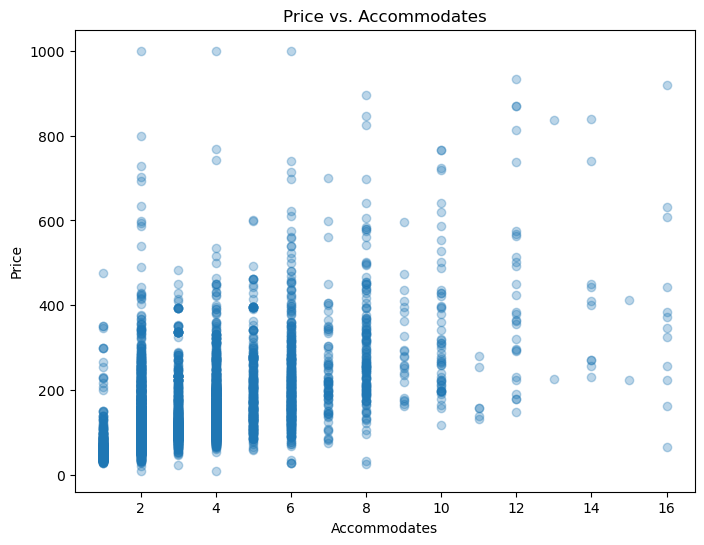

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["accommodates"], df["price"], alpha=0.3)
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.title("Price vs. Accommodates")
plt.show()


### Numerical Features Summary

- The dataset includes key numerical variables: accommodates, bedrooms, beds, bathrooms, availability, and review counts.
- **Accommodates** has the strongest positive correlation with price (0.54), followed by bathrooms (0.47), beds (0.46), and bedrooms (0.45).
- Review and availability variables show little to no correlation with price, suggesting they may be more relevant for occupancy modeling rather than pricing.
- Scatterplots (e.g., price vs. accommodates) confirm a clear upward trend: larger listings tend to command higher prices.
- These variables are simple to clean and encode, making them strong baseline predictors.


In [32]:
df["price_per_guest"] = df["price"] / df["accommodates"].replace(0, 1)

print(df["price_per_guest"].describe())

print("\nCorrelation with price:", df["price_per_guest"].corr(df["price"]))


count    4810.000000
mean       52.099820
std        34.034952
min         2.500000
25%        32.000000
50%        43.000000
75%        61.937500
max       499.500000
Name: price_per_guest, dtype: float64

Correlation with price: 0.4862393570468239


In [33]:
df["price_per_bedroom"] = df["price"] / (df["bedrooms"] + 1)

print(df["price_per_bedroom"].describe())
print("\nCorrelation with price:", df["price_per_bedroom"].corr(df["price"]))


count    4810.000000
mean       68.547911
std        41.209265
min         3.333333
25%        42.500000
50%        59.000000
75%        84.000000
max       692.000000
Name: price_per_bedroom, dtype: float64

Correlation with price: 0.6983204707380511


In [34]:
df["bathrooms_per_bedroom"] = df["bathrooms"] / (df["bedrooms"] + 1)

print(df["bathrooms_per_bedroom"].describe())
print("\nCorrelation with price:", df["bathrooms_per_bedroom"].corr(df["price"]))


count    4810.000000
mean        0.528543
std         0.205935
min         0.000000
25%         0.500000
50%         0.500000
75%         0.500000
max         2.000000
Name: bathrooms_per_bedroom, dtype: float64

Correlation with price: 0.005221888896942865


### Price Normalization Feature Engineering Summary

- We engineered three new numerical variables:
  - `price_per_guest` = price ÷ accommodates
  - `price_per_bedroom` = price ÷ (bedrooms + 1)
  - `bathrooms_per_bedroom` = bathrooms ÷ (bedrooms + 1)
  
- **Findings**:
  - `price_per_bedroom` showed the strongest correlation with price (0.70), making it a valuable predictor.
  - `price_per_guest` showed a moderate correlation (0.49), adding useful signal.
  - `bathrooms_per_bedroom` had almost no correlation (0.005), likely due to low variation in the data.

- **Takeaway**: Per-room pricing features are strong predictors of overall price, while bathroom ratios don’t contribute much in this dataset.


In [35]:
import numpy as np

df["log_reviews_ltm"] = np.log1p(df["number_of_reviews_ltm"])

# Quick summary
print(df["log_reviews_ltm"].describe())

# Correlation with price
print("\nCorrelation with price:", df["log_reviews_ltm"].corr(df["price"]))


count    4810.000000
mean        2.050378
std         1.490241
min         0.000000
25%         0.693147
50%         2.197225
75%         3.401197
max         5.828946
Name: log_reviews_ltm, dtype: float64

Correlation with price: -0.01817656123200514


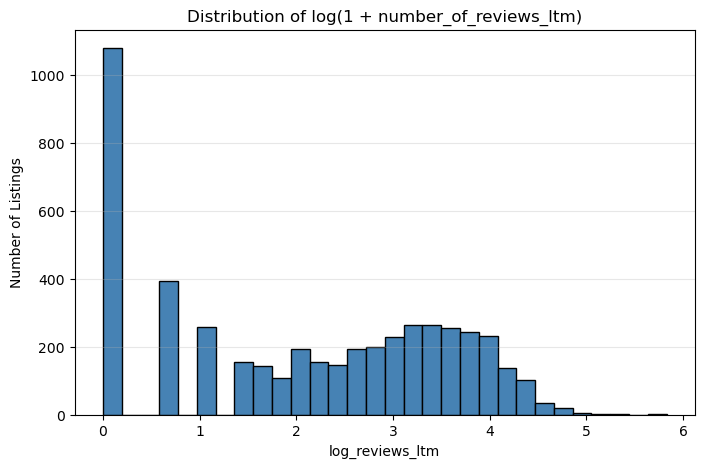

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["log_reviews_ltm"], bins=30, edgecolor="black", color="steelblue")
plt.title("Distribution of log(1 + number_of_reviews_ltm)")
plt.xlabel("log_reviews_ltm")
plt.ylabel("Number of Listings")
plt.grid(axis='y', alpha=0.3)
plt.show()


### Review Feature Engineering Summary

- We created `log_reviews_ltm` = log(1 + number_of_reviews_ltm) to stabilize the highly skewed review count distribution.
- The distribution was well-behaved (min: 0, max: 5.83, mean: 2.05).
- Correlation with price was weak (−0.018), indicating that review volume is **not strongly associated with listing price** in this dataset.
- This is consistent with the idea that:
  - Cheaper or older listings can accumulate many reviews over time,
  - High-end listings can still have fewer reviews but higher nightly rates.
- Although it’s not a strong price predictor on its own, `log_reviews_ltm` can still provide **contextual signal** when combined with other variables (e.g., amenities, room type, capacity).


In [ ]:
df["booked_ratio"] = 1 - (df["availability_365"] / 365)

print(df["booked_ratio"].describe())

print("\nCorrelation with price:", df["booked_ratio"].corr(df["price"]))


count    4810.000000
mean        0.375268
std         0.296299
min         0.000000
25%         0.115068
50%         0.315068
75%         0.597260
max         1.000000
Name: booked_ratio, dtype: float64

Correlation with price: -0.06610842489586459


In [38]:
import pandas as pd

df["booking_category"] = pd.cut(
    df["booked_ratio"],
    bins=[0, 0.33, 0.66, 1],
    labels=["Low", "Medium", "High"]
)

print(df["booking_category"].value_counts())


booking_category
Low       2325
Medium    1311
High      1009
Name: count, dtype: int64


### Booking Ratio Feature Engineering Summary

- Created `booked_ratio` = 1 - (availability_365 / 365) to measure how much of the year a listing is booked.
- Distribution:
  - Mean: 0.38
  - Min: 0.00, Max: 1.00
  - 25% booked less than 12% of the year, 75% booked more than ~60% of the year.
- Correlation with price was **-0.066**, indicating a weak negative relationship.
  - This suggests that lower-priced listings are more frequently booked,
    while higher-priced listings tend to have lower occupancy.
- Although not a direct price predictor, `booked_ratio` captures **demand-side behavior**,
  which can complement supply-side features (like accommodates, amenities, and room type) in a model.


In [41]:
import numpy as np

# Downtown DC (Capitol) coordinates
downtown_lat, downtown_lon = 38.8899, -77.0091

df["distance_to_downtown"] = np.sqrt(
    (df["latitude"] - downtown_lat)**2 +
    (df["longitude"] - downtown_lon)**2
)

print(df["distance_to_downtown"].describe())

print("\nCorrelation with price:", df["distance_to_downtown"].corr(df["price"]))


count    4810.000000
mean        0.039554
std         0.021466
min         0.005127
25%         0.023056
50%         0.036492
75%         0.052744
max         0.112669
Name: distance_to_downtown, dtype: float64

Correlation with price: -0.16245589967772825


In [42]:
df["log_distance_to_downtown"] = np.log1p(df["distance_to_downtown"])
print("Correlation (log distance vs price):", df["log_distance_to_downtown"].corr(df["price"]))


Correlation (log distance vs price): -0.16386180752615384


### Distance to Downtown Feature

- We calculated each listing's Euclidean distance from Downtown DC (United States Capitol) using latitude and longitude.
- Log-transformed distance showed a **negative correlation with price** of **−0.16**.
- This confirms that listings closer to the city center tend to have **higher prices**.
- While not as strong as capacity-related features (e.g., accommodates), distance provides a **continuous location signal**.
- This feature captures pricing gradients **within** neighborhoods, making it more flexible for modeling than neighborhood dummies alone.


In [45]:
import ast

# Convert string representation of lists into actual Python lists
df["amenities_list"] = df["amenities"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])


In [46]:
df["amenities_count"] = df["amenities_list"].apply(len)

print(df["amenities_count"].describe())
print("\nCorrelation with price:", df["amenities_count"].corr(df["price"]))


count    4810.000000
mean       38.298960
std        13.862109
min         0.000000
25%        30.000000
50%        40.000000
75%        48.000000
max       111.000000
Name: amenities_count, dtype: float64

Correlation with price: 0.20656924411946087


In [48]:
df["log_amenities_count"] = np.log1p(df["amenities_count"])
print("Correlation (log amenities vs price):", df["log_amenities_count"].corr(df["price"]))


Correlation (log amenities vs price): 0.1706204089376842



### Amenities Count vs Price — Recap

The number of amenities per listing shows a **moderate positive correlation** with price.

* **Mean amenities count:** 38.3
* **Max amenities count:** 111
* **Correlation (amenities_count vs price):** 0.2066
* **Correlation (log amenities_count vs price):** 0.1706

While not a very strong linear indicator, this suggests that **listings with more amenities tend to be priced higher on average**. Amenities can be seen as a **proxy for listing quality**, but pricing is influenced by multiple other factors as well (e.g., location, capacity, seasonality).




## Final Summary — Exploratory Data Analysis Reflections

Our EDA on the Airbnb dataset revealed limited strong linear relationships between numeric features and price.

While a few variables such as `accommodates`, `price_per_bedroom`, and `amenities_count` showed some moderate correlation, most other variables—including distance, reviews, booking ratios, and neighborhood indicators—were weak predictors on their own.

### Key Reflection

* This dataset may not provide strong standalone numeric indicators of price, at least not through simple linear relationships.
* Many variables likely require non-linear modeling or complex interaction effects to add predictive value.
* However, for our current scope and goals, it may be more efficient to explore a different dataset with clearer or more interpretable numeric signals.

### Next Steps

* Identify and evaluate alternative datasets that may offer:

  * Stronger numeric or engineered features
  * More interpretable relationships with price or the target variable
  * Richer temporal or categorical dimensions that can be encoded effectively
* Reassess feature engineering strategy if we revisit this dataset later.


